In [59]:
%load_ext autoreload
%autoreload 2

from msr.signals.ppg import PPGSignal
from msr.signals.ecg import ECGSignal
from msr.data.download.mimic import load_mimic_raw_tensors_for_split, FS
from msr.data.measurements import MimicMeasurement
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **Loading data and creating Signals objects**

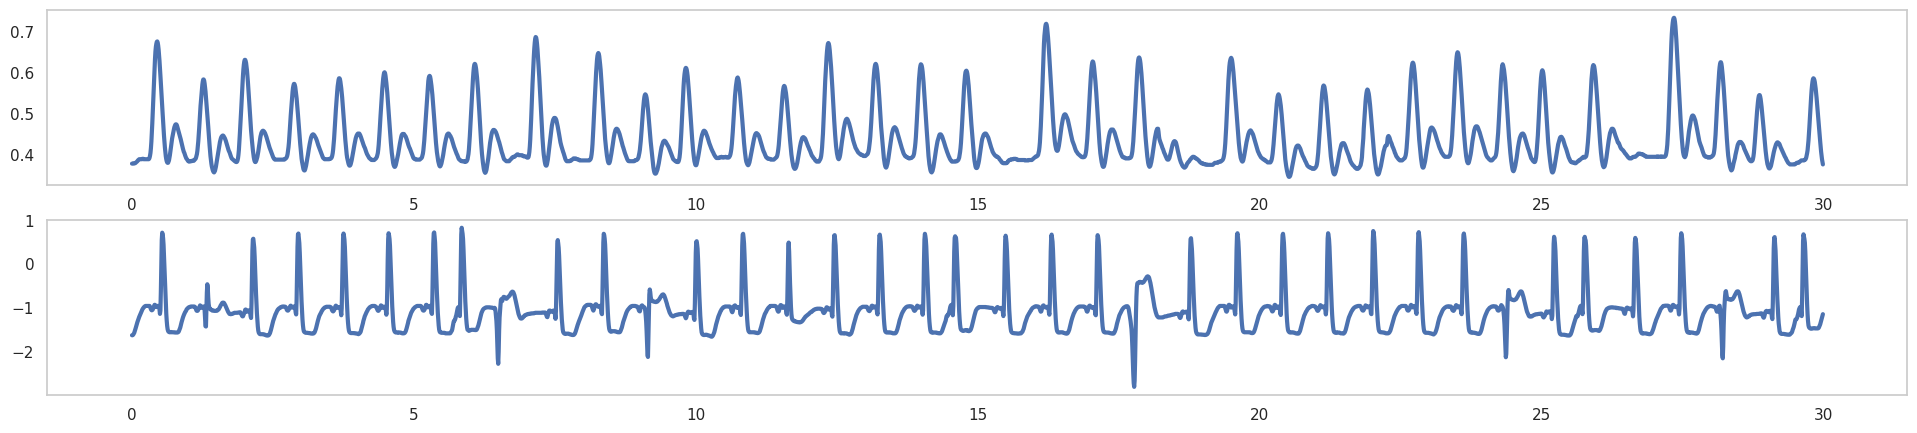

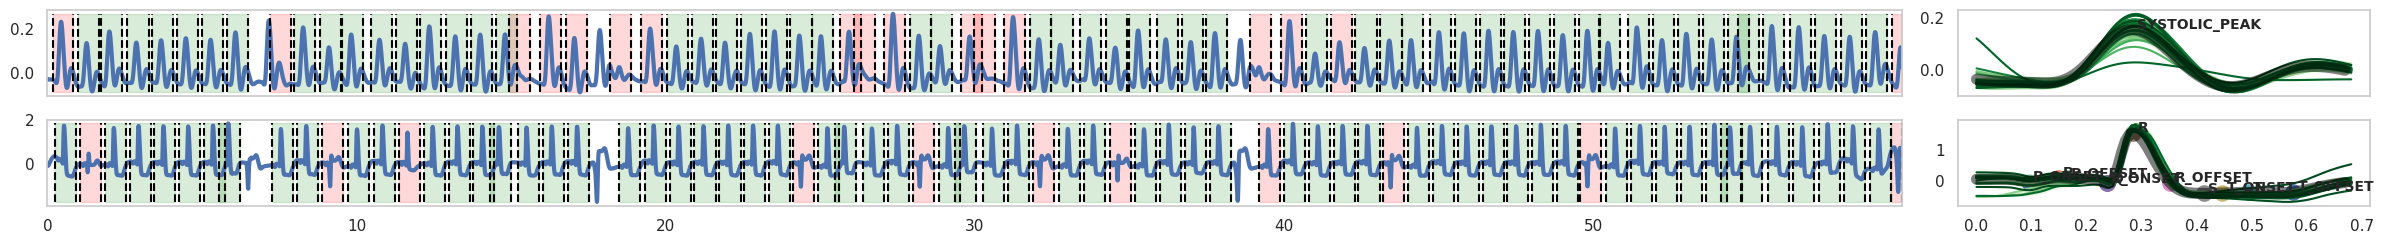

In [60]:
data, targets = load_mimic_raw_tensors_for_split("val", "sbp_dbp_avg")
data, targets = data.numpy(), targets.numpy()
sample = data[0]
ppg, ecg = sample.T
measurement = MimicMeasurement(ppg, ecg, FS)
measurement.set_beats(source_channel='ecg', align_to_peak=True)
measurement.set_agg_beat()
ppg_sig = measurement['ppg']
ecg_sig = measurement['ecg']

fig, axes = plt.subplots(2, 1, figsize=(24, 5))
measurement.plot(0, 30, axes=axes)
measurement.plot_beats_segmentation(invalid=False)

{'peaks': array([0.6154995 , 0.03870386, 0.61406159, 0.39240821, 0.0853893 ]),
 'troughs': array([ 0.36913792,  0.01009586,  0.36851582,  0.19069242, -0.53166983]),
 'amplitudes': array([ 0.24636158,  0.03545507,  0.24878702,  0.0720231 , -0.03894253])}

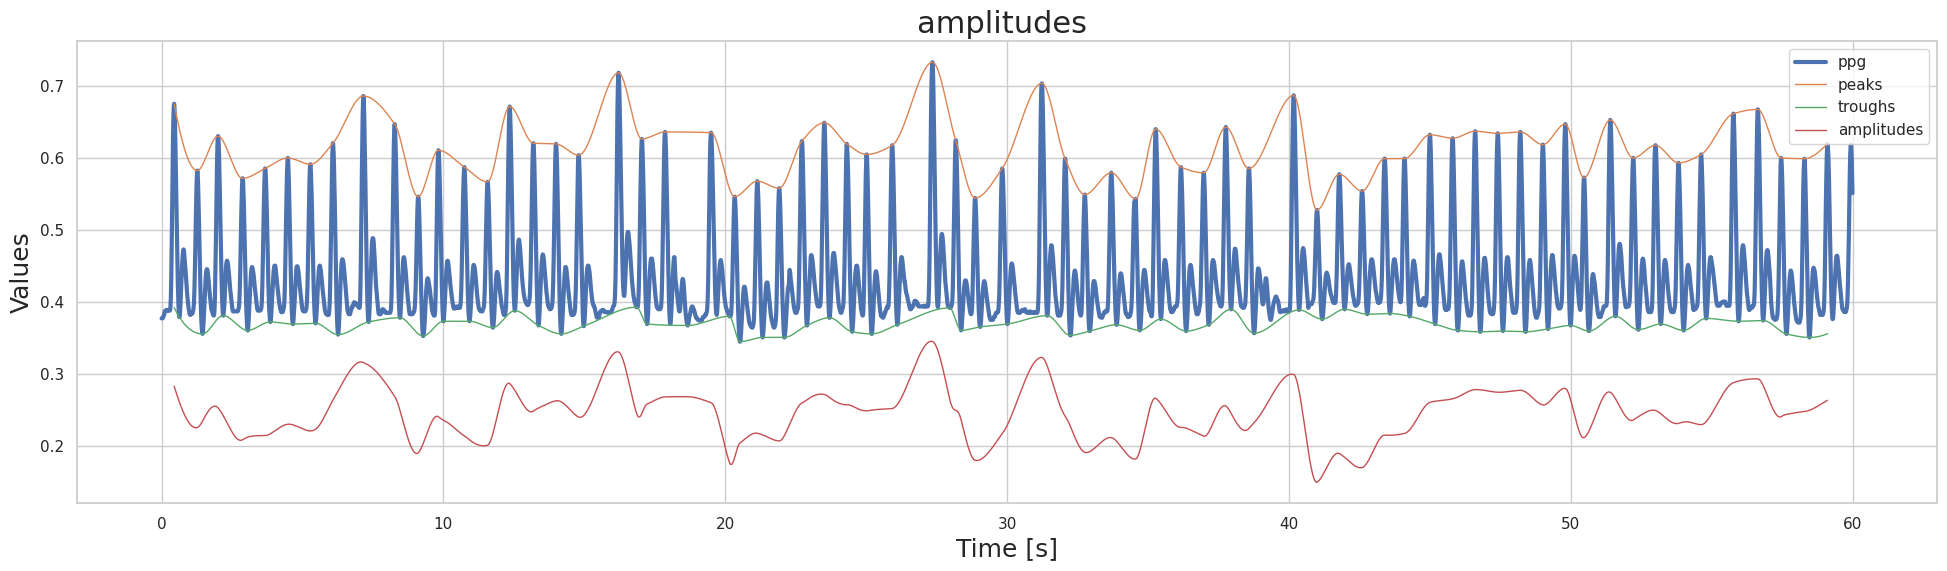

In [61]:
ppg_sig.extract_peaks_troughs_features(return_arr=False, plot=True)

{'peaks': array([ 0.5239889 ,  0.34346812,  0.66219334, -2.10278477,  3.17263475]),
 'troughs': array([-1.32739554,  0.26753944, -1.30448927, -1.18354779,  4.96116474]),
 'amplitudes': array([ 1.85138444,  0.44593299,  1.92408207, -1.18895341,  2.40416343])}

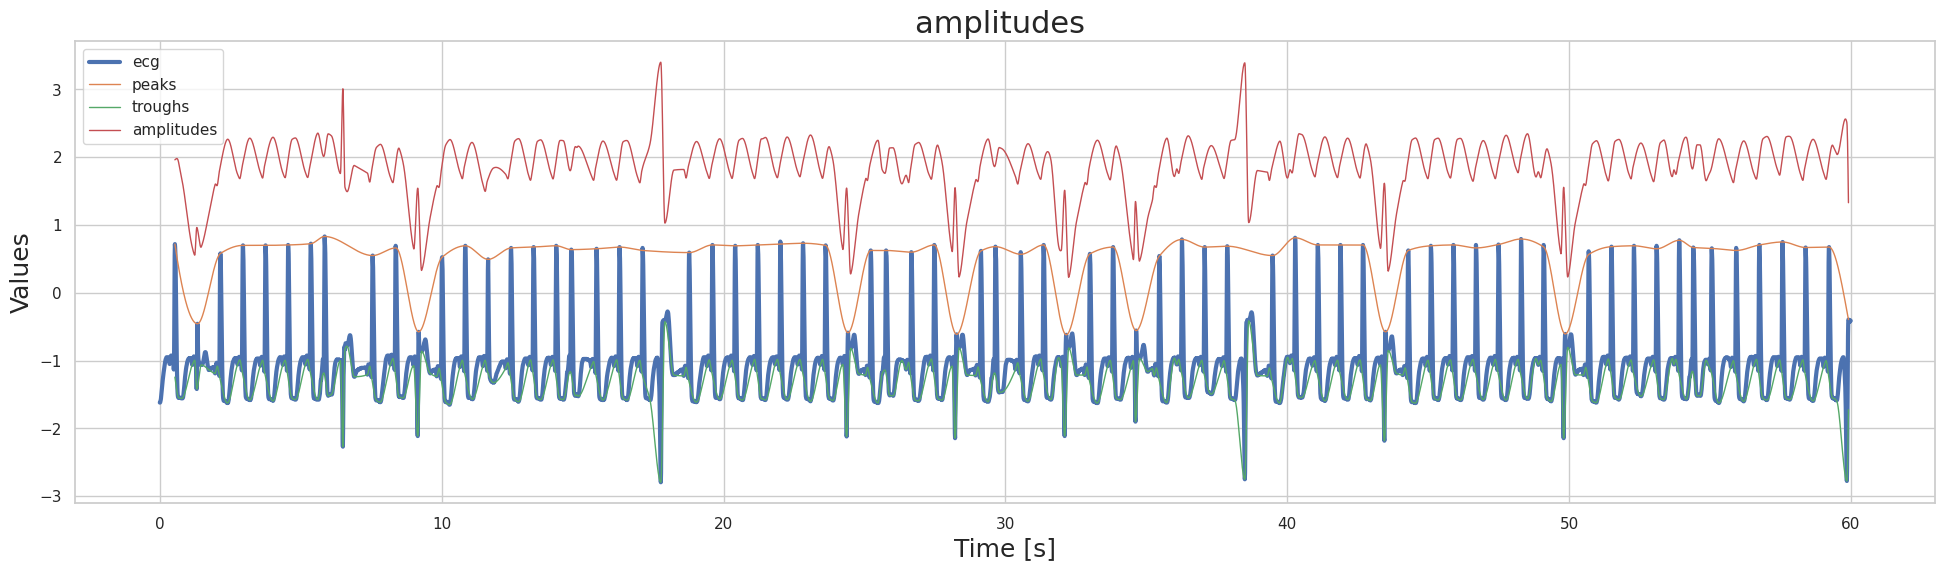

In [62]:
ecg_sig.extract_peaks_troughs_features(return_arr=False, plot=True)